# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [2]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [3]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

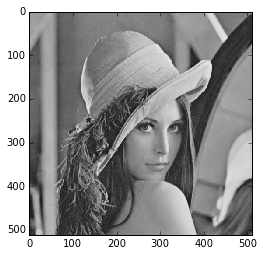

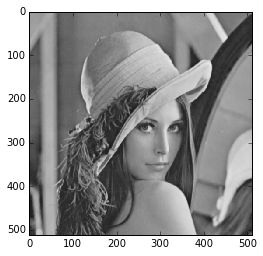

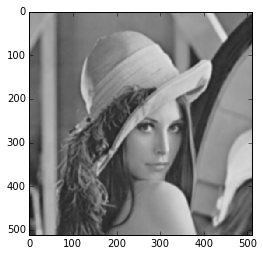

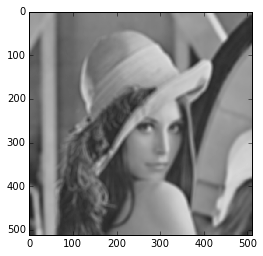

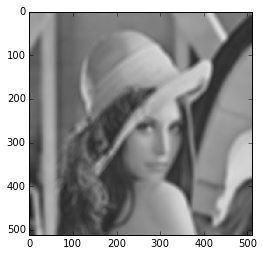

In [12]:
io.imshow(lena_im)
from skimage.filter.rank import mean 
from skimage.morphology import disk

plt.figure()
disk1= disk(1)
meanfiltim1= mean(lena_im, disk1 )
io.imshow(meanfiltim1)
plt.figure()
disk3= disk(3)
meanfiltim3= mean(lena_im, disk3)
io.imshow(meanfiltim3)

plt.figure()
disk5= disk(5)
meanfiltim5= mean(lena_im, disk5)
io.imshow(meanfiltim5)

plt.figure()
disk7= disk(7)
meanfiltim7= mean(lena_im, disk7)
io.imshow(meanfiltim7)


### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 


The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

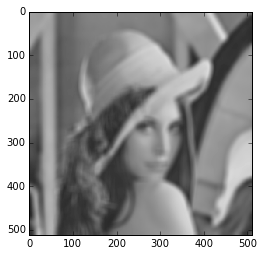

In [60]:
from scipy import ndimage
myarr=(14,14)
mask= np.ones(myarr)/(14*14)
sum(sum(meanmask))

convImage=ndimage.convolve(lena_im, meanmask)
io.imshow(convImage)



Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [61]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

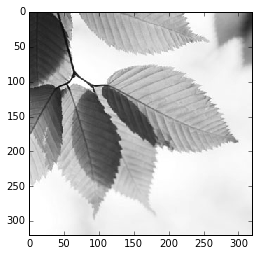

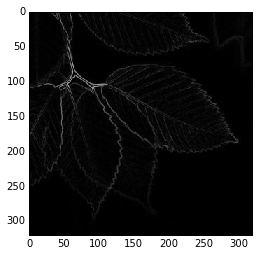

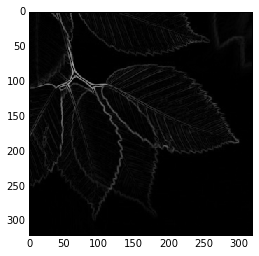

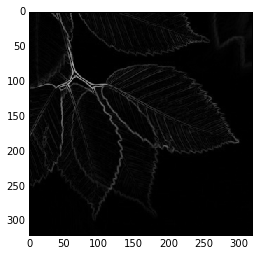

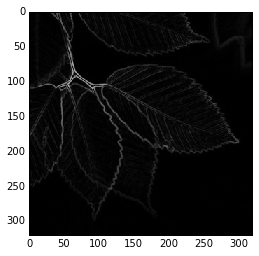

In [75]:
leaves = io.imread(Path.__add__('leaves.jpg'), flatten=True)

io.imshow(leaves)

#####roberts filter ##########
leavesRob=filters.roberts((leaves))
plt.figure()
io.imshow(leavesRob)
#####prewitt filter ##########

leavesPre=filters.prewitt((leaves))
plt.figure()
io.imshow(leavesPre)

##########sobel
leavesSob=filters.sobel((leaves))
plt.figure()
io.imshow(leavesSob)

##########scharr
leavesSch=filters.scharr((leaves))
plt.figure()
io.imshow(leavesSch)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

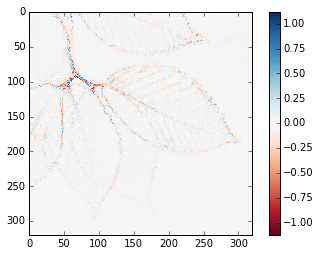

In [87]:
from scipy import ndimage
#ubyleaves=img_as_float(leaves)
lapLeaves=ndimage.filters.laplace(leaves)
io.imshow(lapLeaves)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [83]:
from skimage import util

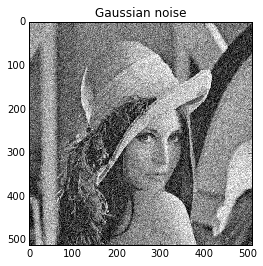

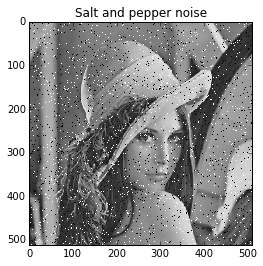

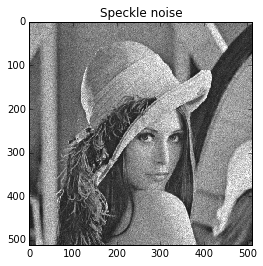

In [85]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

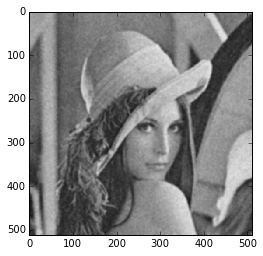

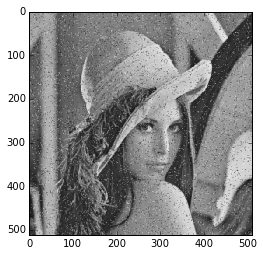

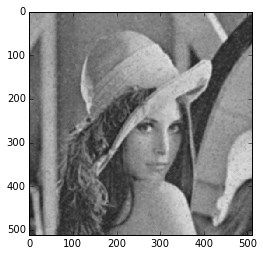

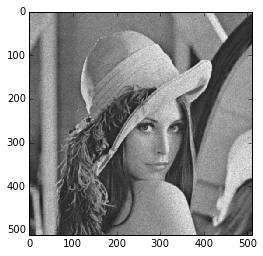

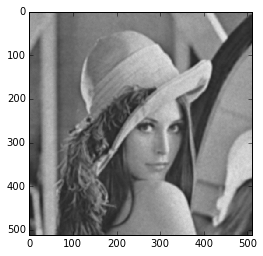

In [97]:
meangD1=mean(lena_gaussian, disk1 )
io.imshow(meangD1)

meangD3=mean(lena_gaussian, disk3 )
io.imshow(meangD3)

meansD1=mean(lena_sp, disk1 )
plt.figure()
io.imshow(meansD1)
meansD3=mean(lena_sp, disk3 )
plt.figure()
io.imshow(meansD3)

meanspekD1=mean(lena_speckle, disk1 )
plt.figure()
io.imshow(meanspekD1)
meanspekD3=mean(lena_speckle, disk3)
plt.figure()
io.imshow(meanspekD3)


** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

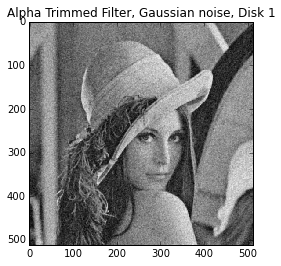

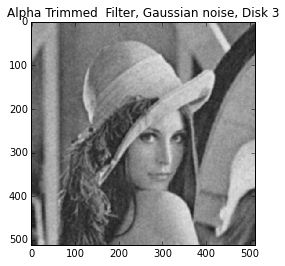

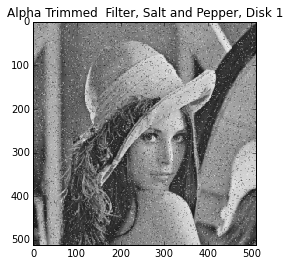

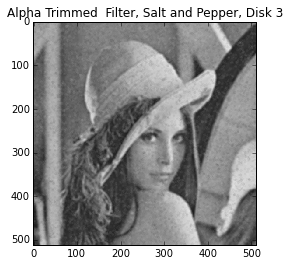

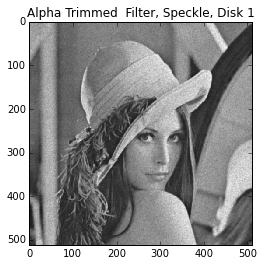

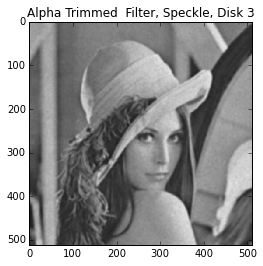

In [111]:
import skimage

disk1 = disk(1)
alphaG1 = filters.rank.mean_percentile(lena_gaussian, disk1, p0=0.05, p1=0.95)
io.imshow(alphaG1)
plt.title('Alpha Trimmed Filter, Gaussian noise, Disk 1')

disk3 = disk(3)
alphag3 = filters.rank.mean_percentile(lena_gaussian, disk3)
plt.figure()
io.imshow(alphag3)
plt.title('Alpha Trimmed  Filter, Gaussian noise, Disk 3')

alphasp1 = filters.rank.mean_percentile(lena_sp, disk1)
plt.figure()
io.imshow(alphasp1)
plt.title('Alpha Trimmed  Filter, Salt and Pepper, Disk 1')

alphasp3 = filters.rank.mean_percentile(lena_sp, disk3)
plt.figure()
io.imshow(alphasp3)
plt.title('Alpha Trimmed  Filter, Salt and Pepper, Disk 3')

alphaspeck1 = filters.rank.mean_percentile(lena_speckle, disk1)
plt.figure()
io.imshow(alphaspeck1)
plt.title('Alpha Trimmed  Filter, Speckle, Disk 1')

alphaspeck3 = filters.rank.mean_percentile(lena_speckle, disk3)
plt.figure()
io.imshow(alphaspeck3)
plt.title('Alpha Trimmed  Filter, Speckle, Disk 3')

** median filter: **

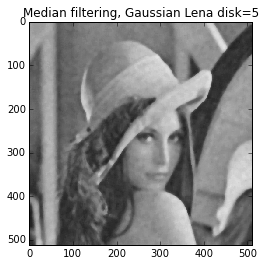

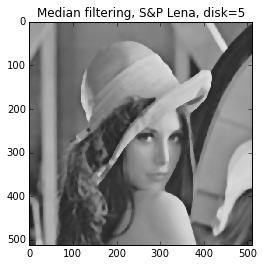

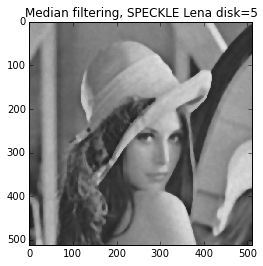

In [117]:
## GAUSSIAN
from skimage.filters.rank import median
medG = median(lena_gaussian, disk(5))
io.imshow(medG)
plt.title('Median filtering, Gaussian Lena disk=5')

## SALT AND PEP
from skimage.filters.rank import median
medSP = median(lena_sp, disk(5))
plt.figure()
io.imshow(medSP)
plt.title('Median filtering, S&P Lena, disk=5')


## speckle
from skimage.filters.rank import median
medSPEK= median(lena_speckle, disk(5))
plt.figure()
io.imshow(medSPEK)
plt.title('Median filtering, SPECKLE Lena disk=5')


## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

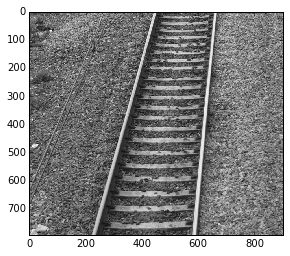

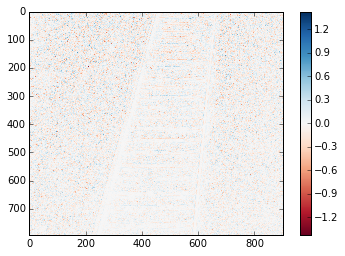

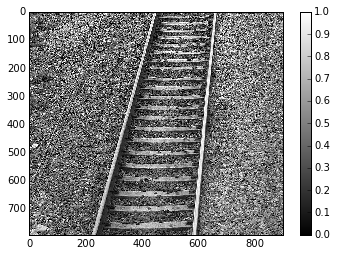

In [135]:
railway= io.imread(Path.__add__('railway.jpg'), flatten=True)
io.imshow(railway)

laprailws=ndimage.filters.laplace(railway)
plt.figure()
io.imshow(laprailws)

#then 
sharpRail=railway-laprailws
plt.figure()
io.imshow(sharpRail,cmap='gray', vmin=0., vmax=1.)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**